<a href="https://colab.research.google.com/github/viniciusendo/dnc_desafio_regressao/blob/main/Desafio_Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**
**Introdução**


Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

**Sobre os dados**


A tabela contém informações dos investimentos feitos pelo youtube, facebook,
newspaper e também a quantidade de cada.
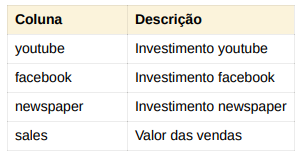

# **Análise Descritiva dos Dados**

## Criação do dataframe e tratamento dos dados

In [ ]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Criação do dataframe
df = pd.read_csv("MKT.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificação de nulos e tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Verifica-se que não existem variáveis nulas e que os tipos de dado estão corretos.

In [ ]:
# Verificação de dados duplicados
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 6.7 KB


Verifica-se que não existem dados duplicados.

## Visualização dos dados

In [ ]:
# Visualização geral dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Observa-se que o investimento médio é consideravelmente maior no Youtube, seguido por Newspaper e Facebook.

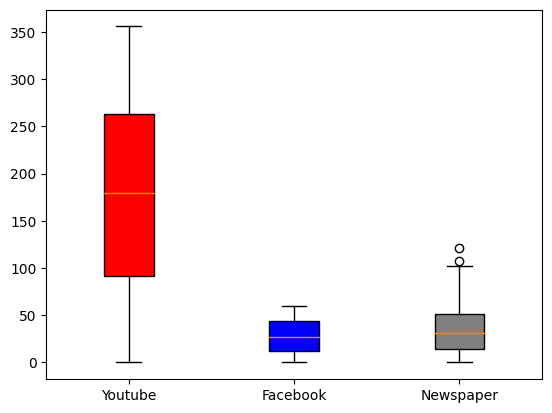

In [ ]:
# @title Geral
bplot1 = plt.boxplot(df.drop(columns=['sales']),
                     vert=True,
                     patch_artist=True,
                     labels =["Youtube","Facebook","Newspaper"])
colors=["red","blue","grey"]
for patch, color in zip(bplot1['boxes'], colors):
      patch.set_facecolor(color)
plt.show()

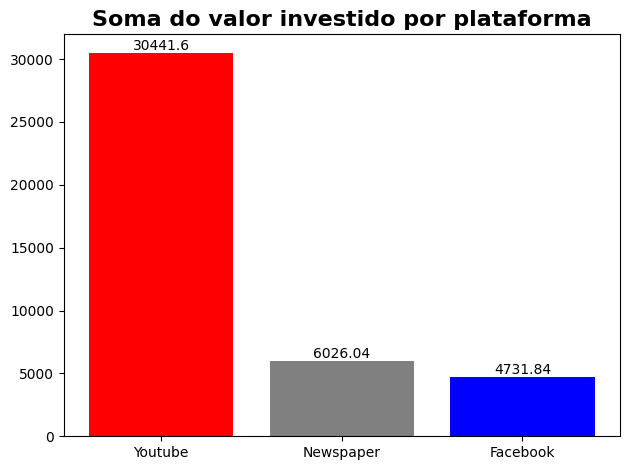

In [ ]:
# Soma do valor investido por plataforma
soma = df.sum().drop("sales").sort_values(ascending=False)
ax = plt.bar(["Youtube","Newspaper","Facebook"], soma, color=["red","grey","blue"])
plt.title("Soma do valor investido por plataforma",fontsize=16, fontweight='bold')
plt.bar_label(ax)
plt.tight_layout()
plt.show()

Observa-se que o investimento em publicidade concentra-se principalmente no Youtube, seguido por Newspaper e Facebook.

**O retorno em vendas foi de 7,60% do total investido em publicidade nas plataformas.**

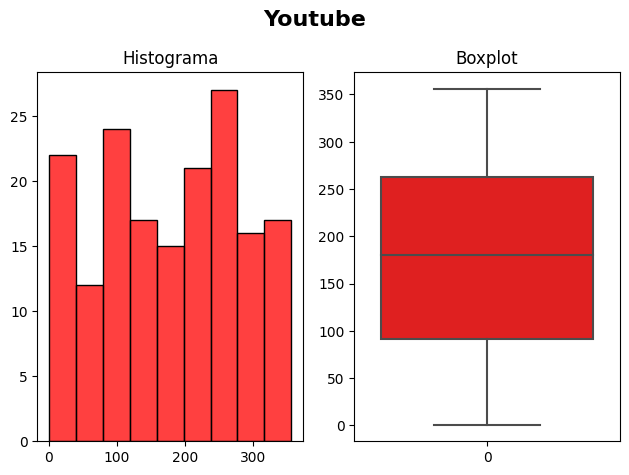

In [ ]:
# @title Youtube
plt.subplot(121)
sns.histplot(df["youtube"], color="red")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["youtube"], color="red")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Youtube',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Observa-se no histograma que a distribuição dos valores investidos na plataforma Youtube não segue nenhum padrão específico. No boxplot, não se observa a presença de nenhum outlier.

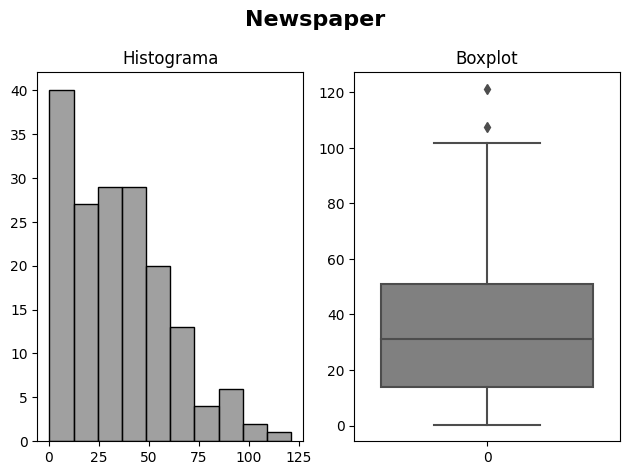

In [ ]:
# @title Newspaper
plt.subplot(121)
sns.histplot(df["newspaper"], color="grey")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["newspaper"], color="grey")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Newspaper',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Observa-se no histograma que a distribuição dos valores investidos na plataforma Newspaper se concentra nos valores mais baixos. No boxplot, observa-se a presença de alguns outliers nos valores superiores.

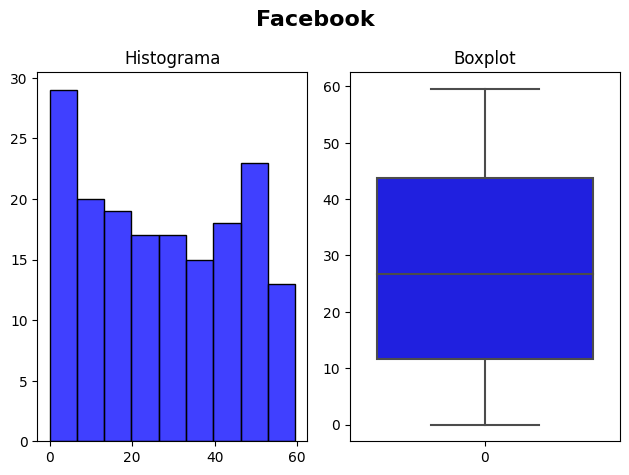

In [ ]:
# @title Facebook
plt.subplot(121)
sns.histplot(df["facebook"], color="blue")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["facebook"], color="blue")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Facebook',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Observa-se no histograma que a distribuição dos valores investidos na plataforma Facebook não segue nenhum padrão específico. No boxplot, não se observa a presença de nenhum outlier.

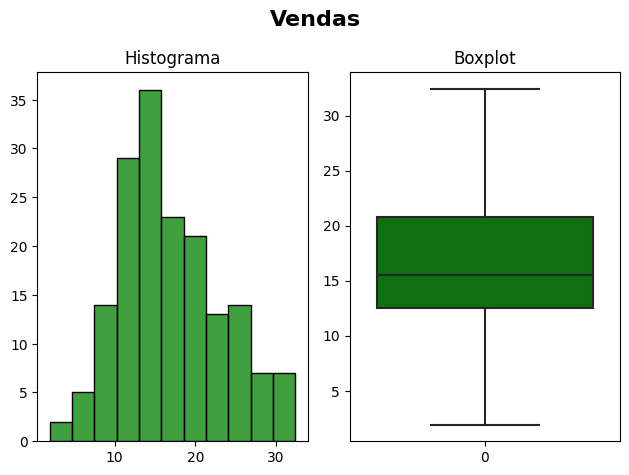

In [ ]:
# @title Sales
plt.subplot(121)
sns.histplot(df["sales"], color="green")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["sales"], color="green")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Vendas',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Observa-se no histograma que a distribuição dos valores das vendas segue uma distribuição normal. No boxplot, não se observa a presença de nenhum outlier.

# **Análise Exploratória dos Dados**

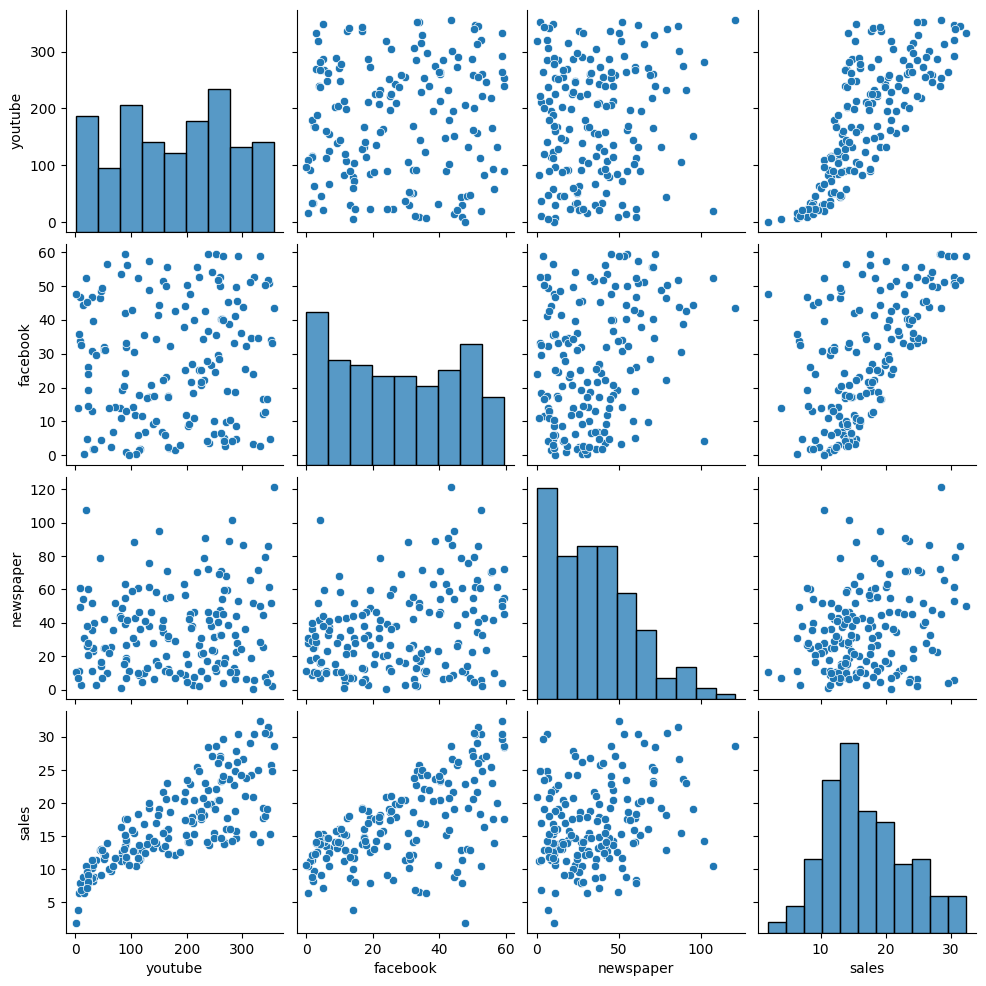

In [ ]:
# @title Pairplot
sns.pairplot(df);

Observa-se a existência de uma certa correlação entre vendas e o valor investido por plataforma.

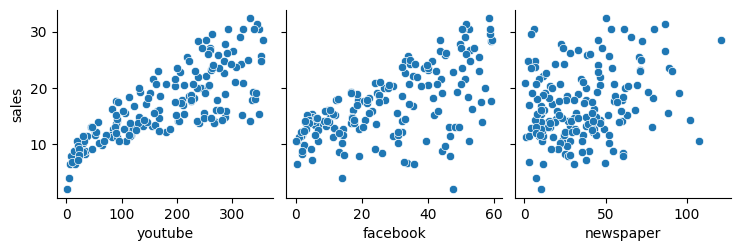

In [ ]:
# Pairplot apenas dos gráficos de interesse
sns.pairplot(df,x_vars=['youtube','facebook','newspaper'],y_vars='sales');

Essa correlação se mostra mais evidente principalmente para as plataformas Youtube e Facebook.

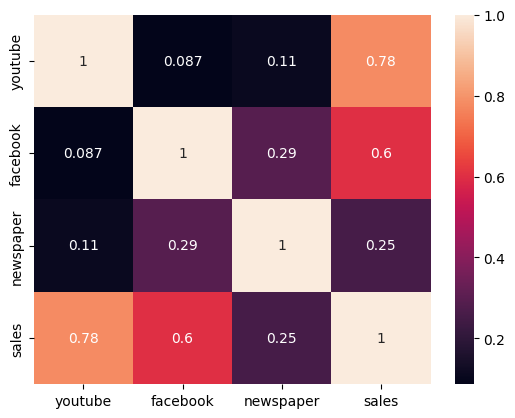

In [ ]:
# @title Correlação entre variáveis
sns.heatmap(df.corr(), annot=True);

Observa-se a existência de uma correlação positiva bem relevante entre vendas e investimento nas plataformas Youtube e Facebook.

**Isso indica que um investimento maior em publicidade nestas plataformas tende a gerar mais retorno em vendas.**

Já para a plataforma Newspaper, um investimento maior não necessariamente tende a gerar maior retorno, uma vez que a correlação existente entre os dois é pequena.

**Ou seja, investimentos maiores em Youtube e Facebook tem maior chance de gerar mais vendas, enquanto investimentos em Newspaper podem ter um retorno mais imprevisível.**

# **Modelagem**

In [ ]:
# Criação das bases de treino e teste
y = df[['sales']]
X = df.drop(columns=['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verificação das bases criadas
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 3)
(35, 3)
(136, 1)
(35, 1)


In [ ]:
# Criação do modelo
reg = LinearRegression()

Como se trata de um modelo simples, não será feita a otimização de hiperparâmetros, serão utilizados os *default*.

In [ ]:
# Treinamento do modelo
modeloReg = reg.fit(X_train,y_train)

# **Predição**

In [ ]:
# @title R-quadrado
print("O r-quadrado é",modeloReg.score(X_test, y_test))

O r-quadrado é 0.872863085701216


O r-quadrado é alto, indicando que o modelo explica grande parte da variabilidade dos dados de resposta ao redor de sua média.

In [ ]:
# Predição do modelo
y_pred = modeloReg.predict(X_test)

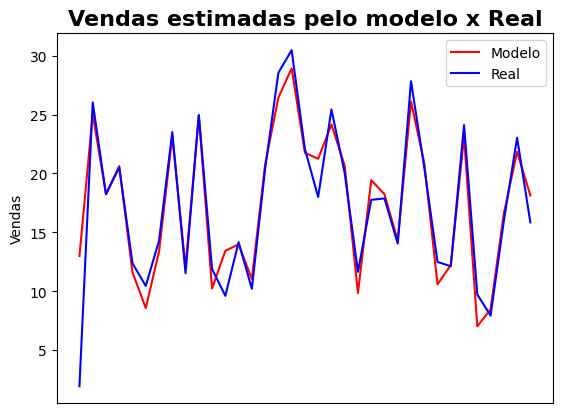

In [ ]:
# @title Comparação entre modelo e real
c = [i for i in range(1, 36, 1)]
plt.plot(c, y_pred, color="red", label="Modelo")
plt.plot(c, y_test, color="blue", label="Real")
plt.title("Vendas estimadas pelo modelo x Real",fontsize=16, fontweight='bold')
plt.ylabel("Vendas")
plt.tick_params(labelbottom = False, bottom = False)
plt.legend()
plt.show()

Graficamente, é possível ver que o modelo se mostrou preciso para fazer previsões utilizando a base de teste.